# **Klasifikasi Berita dengan menggunanakan Closeness Centrality (CNN Indonesia)**

## Deployment

[Streamlit Deployments](https://app-klasifikasi-berita.streamlit.app/)

## Import Library

Code di bawah adalah beberapa baris kode Python yang digunakan untuk melakukan web scraping pada halaman web CNN Indonesia. Kode tersebut menggunakan beberapa library seperti `nltk`, `sklearn`, `networkx`, `seaborn`, dan `matplotlib` untuk melakukan analisis teks dan visualisasi data.

Library `nltk` digunakan untuk melakukan tokenisasi kalimat pada teks, sedangkan library `sklearn` digunakan untuk melakukan penghitungan TF-IDF dan cosine similarity pada teks. Library `networkx`, `seaborn`, dan `matplotlib` digunakan untuk melakukan visualisasi data dalam bentuk grafik dan plot.

Selain itu, kode tersebut juga menggunakan beberapa library lain seperti `re`, `joblib`, dan `pandas` untuk melakukan manipulasi data dan menyimpan hasil web scraping ke dalam file CSV.


In [93]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Dataset

In [94]:
df = pd.read_csv('/content/drive/MyDrive/PPW/PPW/Resource/Data Berita CNN.csv')
df

,Url,Judul,Tanggal,Artikel,Category
0,https://www.cnnindonesia.com/teknologi/2023110...,"Bakal Jadi Saingan Galaxy Fold 5, Apa Keunggul...","Rabu, 08 Nov 2023 18:31 WIB","Pabrikan smartphoneasal China, Oppo segera mer...",Teknologi
1,https://www.cnnindonesia.com/teknologi/2023110...,"Usai Dinyatakan Langgar Etik, Anwar Usman Tren...","Rabu, 08 Nov 2023 17:01 WIB",Sosok mantan Ketua Mahkamah Konstitusi (MK) An...,Teknologi
2,https://www.cnnindonesia.com/teknologi/2023110...,"Meluncur Tahun Depan, Berikut Daftar Hp Xiaomi...","Rabu, 08 Nov 2023 14:04 WIB",Tampilan user interface (UI) atau antarmuka ba...,Teknologi
3,https://www.cnnindonesia.com/teknologi/2023110...,Ramai-ramai Pengguna Uninstall Aplikasi Pemblo...,"Rabu, 08 Nov 2023 12:47 WIB",Ribuan pengguna ramai-ramai menghapus fitur pe...,Teknologi
4,https://www.cnnindonesia.com/teknologi/2023110...,Lubang Ozon 2023 Masuk 12 Besar Sepanjang Seja...,"Rabu, 08 Nov 2023 11:17 WIB",Lubang ozonAntartika tahun 2023 mencapai ukura...,Teknologi
...,...,...,...,...,...
445,https://www.cnnindonesia.com/olahraga/20231103...,"Kericuhan Pecah Usai Laga PSS vs Bali United, ...","Jumat, 03 Nov 2023 21:27 WIB",Kericuhan pecah usai laga PSS Sleman vs Bali U...,Olahraga
446,https://www.cnnindonesia.com/olahraga/20231103...,"MU Dapat Kabar Buruk, Casemiro Harus Menepi ka...","Jumat, 03 Nov 2023 20:18 WIB",Manchester Unitedmendapatkan kabar buruk karen...,Olahraga
447,https://www.cnnindonesia.com/olahraga/20231103...,Erick Thohir Ungkap Justin Hubner Selangkah La...,"Jumat, 03 Nov 2023 19:45 WIB",Ketua Umum PSSIErick Thohir mengatakan proses ...,Olahraga
448,https://www.cnnindonesia.com/olahraga/20231103...,"Jelang Korea Masters, Rahmat Tak Merasa Tertek...","Jumat, 03 Nov 2023 19:32 WIB","Pebulutangkis ganda putra Indonesia,Rahmat Hid...",Olahraga


## 1. Cleaning Data

## Menghapus Data Null

Kode ini memeriksa dan mengatasi data yang hilang (NaN) dalam DataFrame `df`. Data yang hilang dihapus dari DataFrame menggunakan `df.dropna()`.


In [95]:
df.isnull().sum()

Url         0
Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

In [96]:
df = df.dropna()
df.isnull().sum()

Url         0
Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

df.shape digunakan untuk mengembalikan informasi mengenai dimensi dari sebuah DataFrame yang tidak terlihat pada kode yang diberikan. Oleh karena itu, tidak dapat diketahui nilai yang dihasilkan oleh pemanggilan df.shape pada implementasi kode dibawah.

In [97]:
df.shape

(450, 5)

## Menghapus Karakter Tertentu

Fungsi `cleaning` digunakan untuk membersihkan teks dalam kolom 'Abstrak'. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.

In [98]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip().lower()
  return text

df['Cleaning'] = df['Artikel'].apply(cleaning)
df['Cleaning']

0      pabrikan smartphoneasal china, oppo segera mer...
1      sosok mantan ketua mahkamah konstitusi mk anwa...
2      tampilan user interface ui atau antarmuka baru...
3      ribuan pengguna ramairamai menghapus fitur pem...
4      lubang ozonantartika tahun 2023 mencapai ukura...
                             ...                        
445    kericuhan pecah usai laga pss sleman vs bali u...
446    manchester unitedmendapatkan kabar buruk karen...
447    ketua umum pssierick thohir mengatakan proses ...
448    pebulutangkis ganda putra indonesia,rahmat hid...
449    pemainbali unitednovri setiawan pingsan saat b...
Name: Cleaning, Length: 450, dtype: object

## Graph Cosine Similirity

Fungsi `graph_cosine_sim(x, threshold = 0.11)` adalah sebuah fungsi Python yang digunakan untuk membuat grafik similarity antara kalimat-kalimat pada teks yang diberikan melalui parameter `x`. Fungsi ini menggunakan library `nltk`, `sklearn`, dan `networkx` untuk melakukan penghitungan TF-IDF, cosine similarity, dan pembuatan grafik.

Berikut adalah penjelasan singkat mengenai cara kerja fungsi tersebut:
- Pertama-tama, fungsi ini akan membuat sebuah objek `TfidfVectorizer()` dari library `sklearn` untuk melakukan penghitungan TF-IDF pada teks yang diberikan melalui parameter `x`.
- Selanjutnya, fungsi akan melakukan penghitungan cosine similarity antara setiap pasangan kalimat pada teks menggunakan objek `cosine_similarity()` dari library `sklearn`.
- Fungsi akan membuat sebuah objek `nx.Graph()` dari library `networkx` yang merepresentasikan grafik similarity antara kalimat-kalimat pada teks.
- Fungsi akan mengisi nilai similarity antara kalimat-kalimat tersebut ke dalam edges (garis penghubung) pada grafik menggunakan loop `for`.
- Fungsi akan mengembalikan objek grafik yang telah dibuat.

Parameter `threshold` pada fungsi ini digunakan untuk menentukan nilai similarity minimum yang harus dicapai agar dua kalimat dihubungkan oleh sebuah edge pada grafik. Nilai default dari parameter ini adalah 0.11.



In [99]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

## Plot Graph Fuction

Fungsi `plot_graph` di atas digunakan untuk menggambar graf dengan menggunakan pustaka NetworkX dan Matplotlib di Python. Berikut penjelasan dari setiap bagian kode:

1. `def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):`
   - Fungsi ini didefinisikan untuk menggambar graf.
   - `G`: Parameter pertama adalah graf yang akan digambar (objek NetworkX).
   - `figsize`: Parameter opsional yang menentukan ukuran figur (lebar, tinggi) dalam satuan inch. Defaultnya adalah (35, 30).
   - `node_size`: Parameter opsional yang menentukan ukuran simpul dalam graf. Defaultnya adalah 700.
   - `node_color`: Parameter opsional yang menentukan warna simpul dalam graf. Defaultnya adalah 'skyblue'.

2. `pos = nx.spring_layout(G)  # Menentukan posisi simpul`
   - Menggunakan algoritma spring_layout dari NetworkX untuk menentukan posisi simpul dalam graf. Algoritma ini berusaha menempatkan simpul-simpul sedekat mungkin dengan tetangga-tetangganya.

3. `labels = nx.get_edge_attributes(G, 'weight')`
   - Mendapatkan atribut 'weight' dari setiap sisi (edge) dalam graf. Atribut ini diasumsikan sebagai bobot (weight) dari setiap sisi.

4. `plt.figure(figsize=(35, 30))`
   - Membuat figur dengan ukuran yang telah ditentukan.

5. `nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')`
   - Menggambar graf menggunakan fungsi `draw` dari NetworkX.
   - `G`: Graf yang akan digambar.
   - `pos`: Posisi simpul yang telah ditentukan sebelumnya.
   - `with_labels`: Menunjukkan apakah simpul akan diberi label atau tidak (True atau False).
   - `node_size`: Ukuran simpul.
   - `node_color`: Warna simpul.

6. `nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')`
   - Menggambar label di atas setiap sisi dengan menggunakan fungsi `draw_networkx_edge_labels` dari NetworkX.
   - `edge_labels`: Atribut bobot (weight) dari setiap sisi.
   - `font_color`: Warna teks label.

7. `plt.show()`
   - Menampilkan graf yang telah digambar.

Jadi, fungsi ini secara keseluruhan digunakan untuk membuat dan menampilkan visualisasi graf dengan menggunakan NetworkX dan Matplotlib.

In [100]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

## Peringkasan

Fungsi `summarization` di atas memiliki tujuan untuk menghasilkan ringkasan (summary) dari sebuah teks. Berikut penjelasan dari setiap bagian kode:

1. `def summarization(x, k=4, index=1, threshold=0.11, show_centrality=False):`
   - Fungsi ini menerima beberapa parameter:
     - `x`: Teks yang akan di-ringkas.
     - `k`: Jumlah kalimat yang akan dipilih sebagai ringkasan. Defaultnya adalah 4.
     - `index`: Indeks dokumen, digunakan dalam mencetak nilai closeness centrality jika `show_centrality` diatur menjadi `True`. Defaultnya adalah 1.
     - `threshold`: Batas nilai cosine similarity untuk membuat graf. Defaultnya adalah 0.11.
     - `show_centrality`: Jika diatur menjadi `True`, fungsi akan mencetak nilai closeness centrality. Defaultnya adalah `False`.

2. `x = sent_tokenize(x):`
   - Teks dibagi menjadi kalimat-kalimat menggunakan fungsi `sent_tokenize` dari pustaka nltk.

3. `G = graph_cosine_sim(x, threshold):`
   - Fungsi `graph_cosine_sim` dipanggil untuk membuat graf berdasarkan cosine similarity antara kalimat-kalimat dalam teks. Graf ini merepresentasikan hubungan similarity antara kalimat-kalimat.

4. `centrality = nx.closeness_centrality(G):`
   - Menghitung nilai closeness centrality untuk setiap simpul (kalimat) dalam graf menggunakan fungsi `closeness_centrality` dari pustaka NetworkX.

5. `if show_centrality: ...`
   - Jika `show_centrality` diatur menjadi `True`, maka nilai closeness centrality akan dicetak.

6. `centrality = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True)):`
   - Mengurutkan nilai closeness centrality secara menurun.

7. `summary_sentences = []:`
   - Membuat list kosong `summary_sentences` untuk menyimpan kalimat-kalimat yang akan menjadi bagian dari ringkasan.

8. `for i, centr in enumerate(centrality.items()): ...`
   - Mengiterasi melalui item-item dalam dictionary `centrality`.

9. `if i < k: ...`
   - Hanya memasukkan kalimat ke dalam `summary_sentences` jika jumlah kalimat yang sudah dimasukkan masih kurang dari `k` (jumlah yang diinginkan untuk ringkasan).

10. `return (' '.join(summary_sentences), G):`
   - Mengembalikan tuple yang berisi ringkasan dalam bentuk teks dan graf similarity yang digunakan untuk membuat ringkasan.

Fungsi ini, secara keseluruhan, menggunakan metode closeness centrality untuk menentukan kepentingan (signifikansi) setiap kalimat dalam teks, dan kemudian memilih sejumlah kalimat tertinggi untuk membentuk ringkasan.

In [101]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Tokenizing
  x = sent_tokenize(x)

  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

### Contoh Penggunaan 1 Data

Terdapat pemanggilan fungsi `summarization(df["Cleaning"].iloc[:1], k = 5, show_centrality=True, threshold=0.2)`. Fungsi tersebut digunakan untuk melakukan ringkasan teks dari kolom "Cleaning" pada DataFrame `df`.

Fungsi `summarization()` sendiri tidak terdapat pada kode yang diberikan, namun kemungkinan besar fungsi tersebut merupakan fungsi yang telah dibuat sebelumnya. Berdasarkan hasil pencarian, terdapat beberapa sumber yang menjelaskan mengenai cara membuat fungsi `summarization()` di Python menggunakan library seperti NLTK, Gensim, dan Sumy.

Dalam pemanggilan fungsi `summarization()`, terdapat beberapa parameter yang diberikan, yaitu:
- `df["Cleaning"].iloc[:1]`: parameter ini digunakan untuk memberikan teks yang akan di-ringkas. Teks tersebut diambil dari kolom "Cleaning" pada DataFrame `df`.
- `k = 5`: parameter ini digunakan untuk menentukan jumlah kalimat yang akan diambil sebagai hasil ringkasan. Pada kasus ini, akan diambil 5 kalimat.
- `show_centrality=True`: parameter ini digunakan untuk menampilkan nilai centrality dari setiap kalimat pada teks. Centrality digunakan untuk menentukan seberapa penting suatu kalimat dalam teks.
- `threshold=0.2`: parameter ini digunakan untuk menentukan nilai similarity minimum yang harus dicapai agar dua kalimat dihubungkan oleh sebuah edge pada grafik similarity antara kalimat-kalimat pada teks.

Setelah fungsi `summarization()` dijalankan, hasil ringkasan teks akan disimpan pada variabel `summary`, sedangkan grafik similarity antara kalimat-kalimat pada teks akan disimpan pada variabel `G`.



### Nilai Closeness

In [102]:
summary, G = summarization(df["Cleaning"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.11)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.4339622641509434, 1: 0.38333333333333336, 2: 0.46, 3: 0.4339622641509434, 9: 0.45098039215686275, 14: 0.36507936507936506, 16: 0.41818181818181815, 17: 0.3709677419354839, 15: 0.3382352941176471, 20: 0.39655172413793105, 23: 0.39655172413793105, 7: 0.3108108108108108, 8: 0.3150684931506849, 4: 0.19327731092436976, 5: 0.16312056737588654, 12: 0.23232323232323232, 6: 0.2839506172839506, 11: 0.35384615384615387, 13: 0.3150684931506849, 18: 0.3026315789473684, 19: 0.30666666666666664, 22: 0.30666666666666664, 21: 0.2948717948717949, 24: 0.2948717948717949}


### Hasil Ringkasan

In [103]:
summary

'baskoro adiwiyono, head of public relations oppo indonesia mengatakan salah satu keunggulan find n3 fold adalah hp ini dibekali dengan kamera flagship. menurut baskoro dengan fiturfitur kamera mumpuni itu, pihaknya meyakini banyak konsumen yang akan memilih oppo find n3 fold. pabrikan smartphoneasal china, oppo segera merilis hp foldable pertamanya di ri, oppo find n3 fold. oppo menggandeng manufaktur kamera, hassleblad untuk menggarap kamera belakang find n3 fold. sampai saat ini belum ada bocoran harga untuk oppo find n3 fold.'

Tampilan Graph

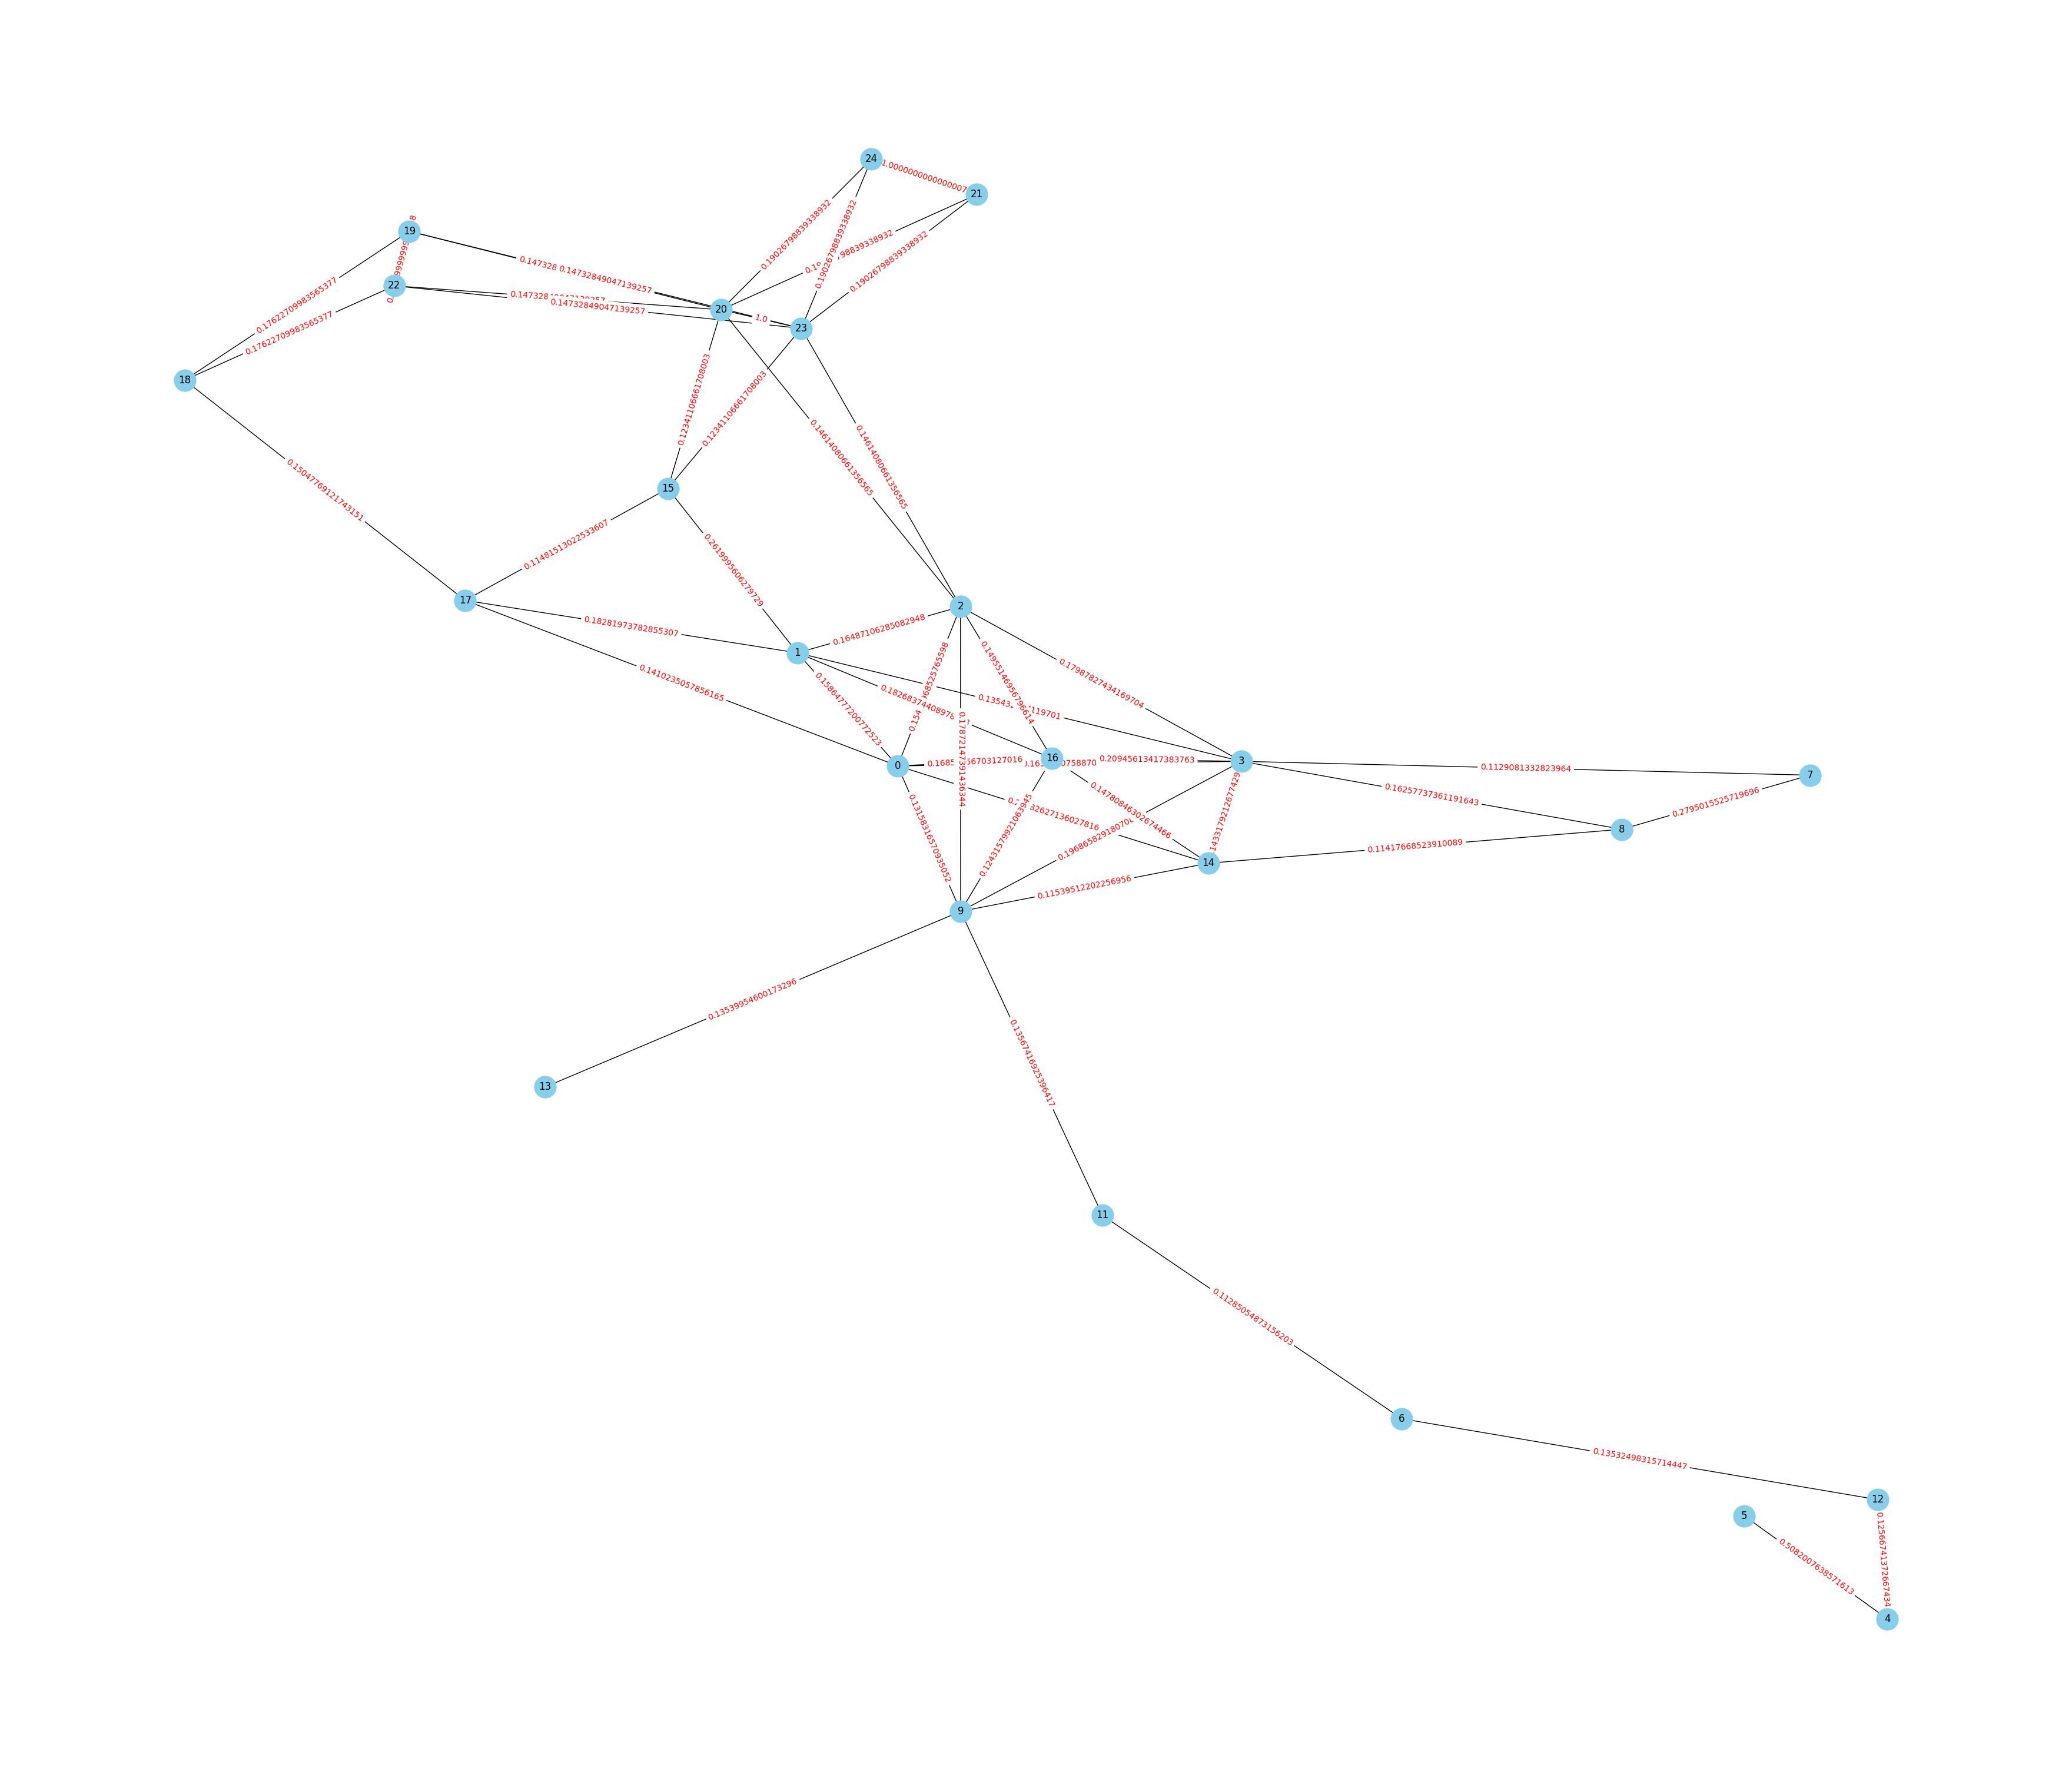

In [104]:
plot_graph(G)

## Peringkasan Semua Data

Terdapat penggunaan fungsi `apply()` pada DataFrame `df`. Fungsi tersebut digunakan untuk menerapkan fungsi `summarization()` pada setiap baris pada kolom "Cleaning" pada DataFrame `df`. Hasil ringkasan teks akan disimpan pada kolom baru "Summary" pada DataFrame `df`.

Fungsi `apply()` pada kode tersebut memiliki beberapa parameter, yaitu:
- `lambda row : summarization(row['Cleaning'], index=row.name+1, k=6, show_centrality=True)`: parameter ini digunakan untuk menerapkan fungsi `summarization()` pada setiap baris pada kolom "Cleaning" pada DataFrame `df`. Fungsi `summarization()` akan menerima teks pada kolom "Cleaning" sebagai input dan mengembalikan hasil ringkasan teks. Hasil ringkasan teks tersebut akan disimpan pada kolom baru "Summary" pada DataFrame `df`.
- `axis=1`: parameter ini digunakan untuk menentukan arah penggunaan fungsi `apply()`. Nilai `1` menunjukkan bahwa fungsi `apply()` akan diterapkan pada setiap baris pada DataFrame `df`.

Setelah fungsi `apply()` dijalankan, hasil ringkasan teks akan disimpan pada kolom baru "Summary" pada DataFrame `df`.



In [105]:
df["Summary"] = df.apply(lambda row : summarization(row['Cleaning'], index=row.name+1, k=6, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.4339622641509434, 1: 0.38333333333333336, 2: 0.46, 3: 0.4339622641509434, 9: 0.45098039215686275, 14: 0.36507936507936506, 16: 0.41818181818181815, 17: 0.3709677419354839, 15: 0.3382352941176471, 20: 0.39655172413793105, 23: 0.39655172413793105, 7: 0.3108108108108108, 8: 0.3150684931506849, 4: 0.19327731092436976, 5: 0.16312056737588654, 12: 0.23232323232323232, 6: 0.2839506172839506, 11: 0.35384615384615387, 13: 0.3150684931506849, 18: 0.3026315789473684, 19: 0.30666666666666664, 22: 0.30666666666666664, 21: 0.2948717948717949, 24: 0.2948717948717949}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 0.423728813559322, 2: 0.5102040816326531, 6: 0.4716981132075472, 11: 0.46296296296296297, 18: 0.43103448275862066, 23: 0.423728813559322, 1: 0.45454545454545453, 7: 0.5681818181818182, 14: 0.43103448275862066, 21: 0.4716981132075472, 5: 0.49019607843137253, 19: 0.4807692307692308, 20: 0.5555555555555556, 4: 0.30120481927710846, 16: 0.2631578

In [106]:
new_df = df[["Summary", "Category"]]
new_df

,Summary,Category
0,"baskoro adiwiyono, head of public relations op...",Teknologi
1,putusan mkmk yang hanya mencopot anwar usman d...,Teknologi
2,sistem operasi berbasis android milik xiaomi i...,Teknologi
3,namun platform streaming ini juga berusaha men...,Teknologi
4,lubang ozonantartika tahun 2023 mencapai ukura...,Teknologi
...,...,...
445,kericuhan pecah usai laga pss sleman vs bali u...,Olahraga
446,tim pengoleksi 20 gelar liga inggris tercecer ...,Olahraga
447,justin hubner merupakan pemain kelahiran belan...,Olahraga
448,ia optimistis bisa bersaing di korea masters 2...,Olahraga


## Save Dataset Hasil Ringkasan

In [107]:
new_df.to_csv('Data Berita Hasil Ringkasan.csv')

## Modeling Dengan Dataset Ringkasan

### Modelling menggunakan Naive Bayes

In [108]:
df["Summary"][0]

'baskoro adiwiyono, head of public relations oppo indonesia mengatakan salah satu keunggulan find n3 fold adalah hp ini dibekali dengan kamera flagship. menurut baskoro dengan fiturfitur kamera mumpuni itu, pihaknya meyakini banyak konsumen yang akan memilih oppo find n3 fold. pabrikan smartphoneasal china, oppo segera merilis hp foldable pertamanya di ri, oppo find n3 fold. oppo menggandeng manufaktur kamera, hassleblad untuk menggarap kamera belakang find n3 fold. sampai saat ini belum ada bocoran harga untuk oppo find n3 fold. dapur pacunya dibekali dengan qualcomm snapdragon 8 gen 2.  layar oppo find n3 dibekali dengan panel layar oled, dengan layar utama dan layar penutup samasama 120 hz.'

#### Vectorizer X_Summary

Pada kode dibawah, terdapat penggunaan library `sklearn` untuk membuat objek `TfidfVectorizer()`. Objek tersebut digunakan untuk mengubah teks pada kolom "Summary" pada DataFrame `df` menjadi vektor numerik yang dapat digunakan sebagai input untuk model machine learning.

Setelah objek `TfidfVectorizer()` dibuat, teks pada kolom "Summary" pada DataFrame `df` akan diubah menjadi vektor numerik menggunakan metode `fit_transform()`. Hasil transformasi tersebut akan disimpan pada variabel `X_summary`.

Selain itu, terdapat juga variabel `y` yang digunakan untuk menyimpan nilai target (kategori) dari setiap teks pada kolom "Summary" pada DataFrame `df". Variabel `y` diisi dengan nilai pada kolom "Category" pada DataFrame `df`.

Dengan menggunakan objek `TfidfVectorizer()` dan variabel `y` tersebut, kita dapat melatih model machine learning untuk melakukan klasifikasi teks berdasarkan kategori yang telah ditentukan.



In [109]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Category"]

#### Splitting Data

Pada kode tersebut, terdapat penggunaan fungsi `train_test_split()` dari library `sklearn` untuk membagi data menjadi data latih dan data uji. Data latih digunakan untuk melatih model machine learning, sedangkan data uji digunakan untuk menguji performa model.

Fungsi `train_test_split()` pada kode tersebut memiliki beberapa parameter, yaitu:
- `X_summary`: parameter ini digunakan untuk memberikan data yang akan dibagi menjadi data latih dan data uji. Pada kasus ini, data yang digunakan adalah vektor numerik hasil transformasi dari teks pada kolom "Summary" pada DataFrame `df`.
- `y`: parameter ini digunakan untuk memberikan nilai target (kategori) dari setiap teks pada kolom "Summary" pada DataFrame `df".
- `test_size=0.3`: parameter ini digunakan untuk menentukan proporsi data yang akan digunakan sebagai data uji. Pada kasus ini, data uji akan terdiri dari 30% dari seluruh data.
- `random_state=42`: parameter ini digunakan untuk menentukan seed yang digunakan dalam pembagian data. Seed ini digunakan untuk memastikan bahwa pembagian data yang dihasilkan dapat direproduksi.

Setelah fungsi `train_test_split()` dijalankan, data latih dan data uji akan disimpan pada variabel `X_train`, `X_test`, `y_train`, dan `y_test`. Variabel `X_train` dan `y_train` akan digunakan untuk melatih model machine learning, sedangkan variabel `X_test` dan `y_test` akan digunakan untuk menguji performa model.



In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_summary, y, test_size=0.3, random_state=42)

#### Modeling Naive Bayes

Pada kode di bawah, terdapat penggunaan model Naive Bayes Gaussian untuk melakukan klasifikasi teks berdasarkan kategori yang telah ditentukan.

Pertama-tama, objek `GaussianNB()` dibuat untuk menginisialisasi model Naive Bayes Gaussian. Selanjutnya, model tersebut dilatih menggunakan data latih dengan menggunakan metode `fit()`. Data latih yang digunakan adalah vektor numerik hasil transformasi dari teks pada kolom "Summary" pada DataFrame `df` yang telah dibagi menjadi data latih dan data uji menggunakan fungsi `train_test_split()`.

Setelah model dilatih, model tersebut digunakan untuk melakukan prediksi pada data uji dengan menggunakan metode `predict()`. Hasil prediksi tersebut akan disimpan pada variabel `y_pred`.



In [111]:
# Inisialisasi model Naive Bayes Gaussian
gnb = GaussianNB()

# Melatih model menggunakan data latih
gnb.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_gnb = gnb.predict(X_test)

#### Accuracy

Kode dibawah digunakan untuk mengukur kinerja model yang telah dilatih sebelumnya dengan menggunakan metrik akurasi. Metrik akurasi digunakan untuk mengukur seberapa akurat model dalam melakukan klasifikasi teks berdasarkan kategori yang telah ditentukan.

Pada kode tersebut, terdapat penggunaan fungsi `accuracy_score(y_test, y_pred)` dari library `sklearn` untuk menghitung akurasi model. Fungsi tersebut menerima dua parameter, yaitu `y_test` dan `y_pred`. Parameter `y_test` digunakan untuk memberikan nilai target (kategori) dari setiap teks pada data uji, sedangkan parameter `y_pred` digunakan untuk memberikan hasil prediksi dari model pada data uji.

Setelah fungsi `accuracy_score()` dijalankan, hasil akurasi model akan disimpan pada variabel `accuracy`. Hasil akurasi tersebut akan dicetak pada layar menggunakan fungsi `print()`.



In [112]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9407407407407408


#### Evaluasi

Kode dibawah digunakan untuk menghasilkan laporan klasifikasi pada model yang telah dilatih sebelumnya. Laporan klasifikasi tersebut akan menampilkan beberapa metrik evaluasi kinerja model, seperti precision, recall, f1-score, dan support.

Pada kode tersebut, terdapat penggunaan fungsi `classification_report(y_test, y_pred)` dari library `sklearn` untuk menghasilkan laporan klasifikasi. Fungsi tersebut menerima dua parameter, yaitu `y_test` dan `y_pred`. Parameter `y_test` digunakan untuk memberikan nilai target (kategori) dari setiap teks pada data uji, sedangkan parameter `y_pred` digunakan untuk memberikan hasil prediksi dari model pada data uji.

Setelah fungsi `classification_report()` dijalankan, hasil laporan klasifikasi akan disimpan pada variabel `report`. Hasil laporan klasifikasi tersebut akan dicetak pada layar menggunakan fungsi `print()`.



In [113]:
report = classification_report(y_test, y_pred_gnb)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Ekonomi       0.84      0.97      0.90        37
    Olahraga       1.00      1.00      1.00        43
   Teknologi       0.98      0.87      0.92        55

    accuracy                           0.94       135
   macro avg       0.94      0.95      0.94       135
weighted avg       0.95      0.94      0.94       135



#### Confusion Matrix

Kode di bawah digunakan untuk membuat plot confusion matrix dari hasil klasifikasi teks menggunakan model Naive Bayes Gaussian. Confusion matrix adalah tabel yang digunakan untuk mengevaluasi kinerja model dalam melakukan klasifikasi teks berdasarkan kategori yang telah ditentukan.

Pada kode tersebut, terdapat penggunaan fungsi `plot_confusion_matrix(cm)` untuk membuat plot confusion matrix. Fungsi tersebut menerima satu parameter, yaitu `cm`, yang merupakan hasil confusion matrix dari klasifikasi teks menggunakan model machine learning Naive Bayes Gaussian.

Setelah fungsi `plot_confusion_matrix()` dijalankan, plot confusion matrix akan ditampilkan pada layar menggunakan library `matplotlib` dan `seaborn`. Plot tersebut akan menampilkan nilai true positive, true negative, false positive, dan false negative dari setiap kategori pada data uji. Plot tersebut dapat digunakan untuk mengevaluasi kinerja model dalam melakukan klasifikasi teks berdasarkan kategori yang telah ditentukan.


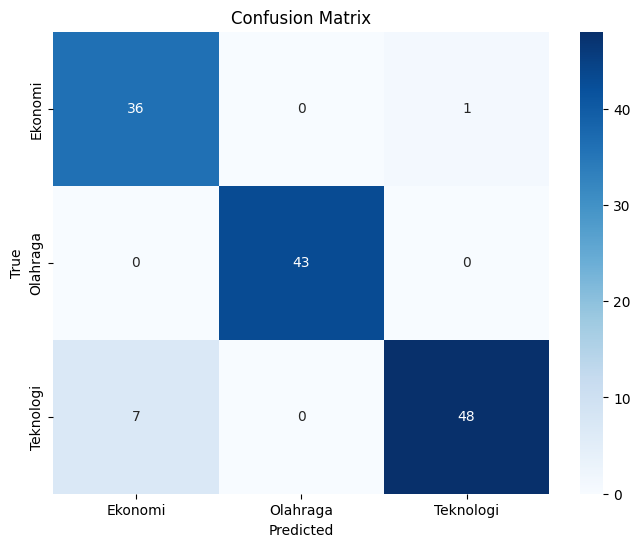

In [114]:
def plot_confusion_matrix(cm, model):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test, y_pred_gnb)
plot_confusion_matrix(cm, gnb)

#### Prediction

##### Data Baru dengan Peringkasan

Fungsi summarization() untuk menghasilkan ringkasan teks berita yang lebih singkat dan padat. Hasil ringkasan tersebut akan disimpan pada variabel new_data_summary.

In [115]:
new_data = ["Sebuah tim peneliti, yang dipimpin oleh mahasiswa doktoral Institute of Agricultural Engineering, University of Bonn, Jerman Sonja Hillemacher dan Dr. Inga Tiemann, telah melakukan penelitian ilmiah selama bertahun-tahun terhadap perilaku ayam di depan cermin. Ide bereksperimen dengan ayam datang dari para ilmuwan tersebut bersama guru besar Biopsikologi dari Departemen Biopsikologi di Universitas Ruhr, Onur Güntürkün. Filosofi penelitian ini bermula dari sebuah pertanyaan terkait 'Apakah hewan dapat mengenali dirinya sendiri?,' kata Sonja Hillemacher. Penelitian ini pun bertujuan untuk menjawab pertanyaan apakah ayam mampu mengenali diri mereka sendiri ketika berinteraksi dengan cermin. Metode Pendekatan Perilaku Hewan Penelitian ini mengadopsi metode yang telah umum digunakan dalam uji cermin, yang dikenal sebagai 'mark test'. Dalam tes ini, tanda berwarna ditempatkan di tubuh hewan yang hanya dapat dikenali oleh individu tersebut ketika ia melihat dirinya sendiri di cermin. Apabila hewan tersebut mulai memeriksa atau meraba area tubuhnya yang ditandai di depan cermin, itu menunjukkan bahwa hewan telah mengenali wujudnya sebagai dirinya sendiri. Namun, tes ini tidak selalu berhasil, di mana sebagian hewan yang diyakini sadar diri, tidak memperhatikan cermin. Mungkin, karena mereka merasa tidak nyaman dalam lingkungan percobaan 'buatan'? Penelitian ini mencoba mendekati eksperimen ini dengan mempertimbangkan perilaku alami ayam yang relevan secara ekologis. 'Beberapa ayam, terutama ayam jantan, memperingatkan sesamanya melalui panggilan khusus ketika ada predator -- seperti burung pemangsa atau rubah - - muncul,' kata Güntürkün. Sebaliknya jika ayam jago berhadapan dengan predatornya sendirian, biasanya mereka akan berdiam diri agar tidak menarik perhatian predator itu sendiri dan menjadi korban. 'Seruan peringatan adalah perilaku sempurna untuk diintegrasikan ke dalam tes kesadaran diri yang lebih relevan secara ekologis,' tambah biopsikolog tersebut. Uji Coba dengan Melepas Burung Pemangsa Pertama, penelitian ini memeriksa apakah ayam jantan benar-benar mengeluarkan panggilan alarm saat berhadapan dengan spesies dan tetap diam saat sendirian. Ilmuwan membangun tempat uji coba khusus yang memisahkan dua area di mana ayam jantan dapat melihat satu sama lain. Setelah itu, seekor burung pemangsa pun dilepaskan di langit-langit sebuah area. Dengan melibatkan 58 ekor ayam jantan, setiap ayamnya mengalami proses pengulangan penelitian sebanyak tiga kali untuk memvalidasi hasil statistik. Hasilnya pun menunjukkan bahwa ayam jantan mengeluarkan 77 panggilan alarm saat berhadapan dengan ayam jantan lain, tetapi hanya 17 panggilan ketika ayam jantan itu sendiri. Dengan begitu, ini menunjukkan bahwa sebagian besar ayam jantan sangat waspada saat menghadapi sesamanya ketika predator terlihat. Uji Coba dengan Cermin Langkah selanjutnya adalah menempatkan cermin di antara dua kompartemen, bukan di dalam kisi-kisi. Dalam proses penelitian ini, para peneliti menjalankannya tiga kali dengan masing-masing hewan. Hasilnya, hanya 25 panggilan alarm yang dikeluarkan selama 174 percobaan. Hasil ini mendukung gagasan bahwa ayam jantan mungkin mengenali dirinya sendiri dalam bayangan cerminnya. Namun, masih diperlukan penelitian lebih lanjut untuk memahami apakah hewan-hewan tersebut melihat bayangan diri mereka sebagai entitas yang sama atau sebagai binatang asing yang meniru perilaku mereka sendiri. Penelitian ini menunjukkan bahwa uji tanda cermin yang mengintegrasikan perilaku hewan ke dalam konteks yang lebih relevan secara ekologis memberikan hasil yang lebih dapat diandalkan."]
new_data_summary, G = summarization(new_data[0], k=5)
new_data_summary

'Dalam tes ini, tanda berwarna ditempatkan di tubuh hewan yang hanya dapat dikenali oleh individu tersebut ketika ia melihat dirinya sendiri di cermin. Hasil ini mendukung gagasan bahwa ayam jantan mungkin mengenali dirinya sendiri dalam bayangan cerminnya. Apabila hewan tersebut mulai memeriksa atau meraba area tubuhnya yang ditandai di depan cermin, itu menunjukkan bahwa hewan telah mengenali wujudnya sebagai dirinya sendiri. Hasilnya pun menunjukkan bahwa ayam jantan mengeluarkan 77 panggilan alarm saat berhadapan dengan ayam jantan lain, tetapi hanya 17 panggilan ketika ayam jantan itu sendiri. Penelitian ini pun bertujuan untuk menjawab pertanyaan apakah ayam mampu mengenali diri mereka sendiri ketika berinteraksi dengan cermin.'

##### TFIDF Hasil Peringkasan

Kode dibawah digunakan untuk menghitung nilai TF-IDF dari ringkasan teks berita yang telah dihasilkan sebelumnya menggunakan fungsi `summarization()`. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk menghitung bobot kata dalam sebuah dokumen berdasarkan frekuensi kemunculan kata tersebut dalam dokumen tersebut dan seluruh dokumen yang ada.

Pada kode tersebut, terdapat penggunaan fungsi `transform()` dari library `sklearn` untuk menghitung nilai TF-IDF dari ringkasan teks berita. Fungsi tersebut menerima satu parameter, yaitu `new_data_summary`, yang merupakan ringkasan teks berita yang akan dihitung nilai TF-IDF-nya. Setelah fungsi `transform()` dijalankan, nilai TF-IDF dari ringkasan teks berita tersebut akan disimpan pada variabel `tfidf_Xnew_summary` dalam bentuk array.



In [116]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

### Prediksi Category

Kode dibawah digunakan untuk melakukan prediksi kategori berita dari ringkasan teks berita yang telah dihasilkan sebelumnya menggunakan model Naive Bayes Gaussian yang telah dilatih sebelumnya. Pada kode tersebut, terdapat penggunaan fungsi `predict()` dari model `gnb` untuk melakukan prediksi kategori berita dari ringkasan teks berita yang disimpan pada variabel `tfidf_Xnew_summary`. Setelah fungsi `predict()` dijalankan, hasil prediksi kategori berita akan disimpan pada variabel `pred`. Karena `pred` merupakan array, maka untuk mendapatkan hasil prediksi kategori berita yang sebenarnya, perlu dilakukan indexing pada elemen pertama dari array tersebut menggunakan `pred`.



In [117]:
pred = gnb.predict(tfidf_Xnew_summary)
pred[0]

'Ekonomi'

### Save Vectorizer

In [118]:
joblib.dump(vectorizer_summary, 'vectorizer_summary.pkl')

['vectorizer_summary.pkl']

### Save Model Naive Bayes

In [119]:
joblib.dump(gnb, 'modelNB_summary.pkl')

['modelNB_summary.pkl']

## Modelling Naive Bayes Tanpa Menggunakan Dataset Ringkasan

In [120]:
df["Artikel"][0]

'Pabrikan smartphoneasal China, Oppo segera merilis Hp foldable pertamanya di RI, Oppo Find N3 Fold. Hp ini bakal menjadi pesaing utama Samsung Galaxy Fold 5, lalu apa keunggulanOppo Find N3 Fold? Baskoro Adiwiyono, Head of Public Relations Oppo Indonesia mengatakan salah satu keunggulan Find N3 Fold adalah Hp ini dibekali dengan kamera flagship. Oppo menggandeng manufaktur kamera, Hassleblad untuk menggarap kamera belakang Find N3 Fold. "Kami luncurkan dengan fitur flagship yang sesungguhnya. Kenapa fitur flagship yg sesungguhnya? Karena kameranya flagship," kata Baskoro saat ditemui di Jakarta Selatan, Rabu (8/11). SCROLL TO CONTINUE WITH CONTENT "Bahkan ada kamera telefotonya, satu-satunya smartphone foldable yang punya telefoto," imbuhnya.  Kamera utama Hp ini terdiri dari tiga kamera belakang, yakni 48 MP Ultra Sensing Wide Angle Camera, 64 MP Ultra Sensing Periscope Telephoto Camera, dan 48 MP Ultra Wide Angle Camera. Sedangkan, kamera depan dilengkapi dengan konfigurasi kamera 2

### Vectorizer X

In [121]:
vectorizer = TfidfVectorizer()
X_artikel = vectorizer.fit_transform(df["Artikel"]).toarray()
y = df["Category"]

### Splitting Data

In [122]:
X_train_TR, X_test_TR, y_train_TR, y_test_TR = train_test_split(X_artikel, y, test_size=0.3, random_state=42)

### Modeling Menggunakan Naive Bayes

In [123]:
# Inisialisasi model Naive Bayes Gaussian
gnb_TR = GaussianNB()

# Melatih model menggunakan data latih
gnb_TR.fit(X_train_TR, y_train_TR)

# Membuat prediksi pada data uji
y_pred_TR = gnb_TR.predict(X_test_TR)

### Accuracy

In [124]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_TR, y_pred_TR)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9407407407407408


### Evaluasi

In [125]:
report = classification_report(y_test_TR, y_pred_TR)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Ekonomi       0.89      0.89      0.89        37
    Olahraga       0.95      0.98      0.97        43
   Teknologi       0.96      0.95      0.95        55

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



### Confusion Matrix

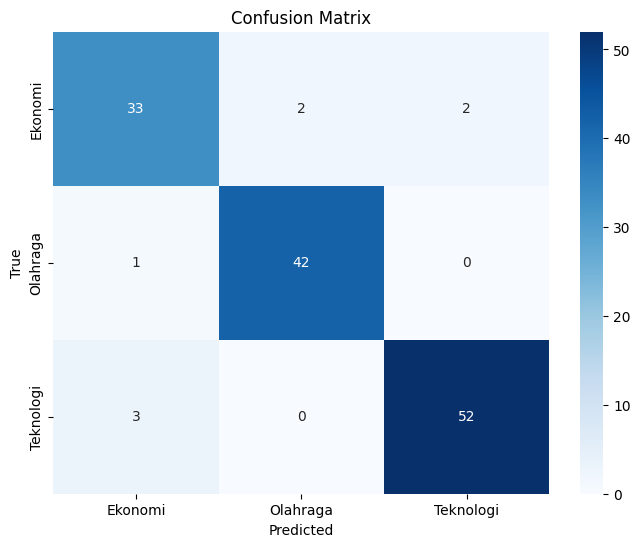

In [126]:
def plot_confusion_matrix(cm, model):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_TR, y_pred_TR)
plot_confusion_matrix(cm, gnb_TR)

### Prediction

#### Data Baru tanpa peringkasan

In [127]:
new_data = ["Sebuah tim peneliti, yang dipimpin oleh mahasiswa doktoral Institute of Agricultural Engineering, University of Bonn, Jerman Sonja Hillemacher dan Dr. Inga Tiemann, telah melakukan penelitian ilmiah selama bertahun-tahun terhadap perilaku ayam di depan cermin. Ide bereksperimen dengan ayam datang dari para ilmuwan tersebut bersama guru besar Biopsikologi dari Departemen Biopsikologi di Universitas Ruhr, Onur Güntürkün. Filosofi penelitian ini bermula dari sebuah pertanyaan terkait 'Apakah hewan dapat mengenali dirinya sendiri?,' kata Sonja Hillemacher. Penelitian ini pun bertujuan untuk menjawab pertanyaan apakah ayam mampu mengenali diri mereka sendiri ketika berinteraksi dengan cermin. Metode Pendekatan Perilaku Hewan Penelitian ini mengadopsi metode yang telah umum digunakan dalam uji cermin, yang dikenal sebagai 'mark test'. Dalam tes ini, tanda berwarna ditempatkan di tubuh hewan yang hanya dapat dikenali oleh individu tersebut ketika ia melihat dirinya sendiri di cermin. Apabila hewan tersebut mulai memeriksa atau meraba area tubuhnya yang ditandai di depan cermin, itu menunjukkan bahwa hewan telah mengenali wujudnya sebagai dirinya sendiri. Namun, tes ini tidak selalu berhasil, di mana sebagian hewan yang diyakini sadar diri, tidak memperhatikan cermin. Mungkin, karena mereka merasa tidak nyaman dalam lingkungan percobaan 'buatan'? Penelitian ini mencoba mendekati eksperimen ini dengan mempertimbangkan perilaku alami ayam yang relevan secara ekologis. 'Beberapa ayam, terutama ayam jantan, memperingatkan sesamanya melalui panggilan khusus ketika ada predator -- seperti burung pemangsa atau rubah - - muncul,' kata Güntürkün. Sebaliknya jika ayam jago berhadapan dengan predatornya sendirian, biasanya mereka akan berdiam diri agar tidak menarik perhatian predator itu sendiri dan menjadi korban. 'Seruan peringatan adalah perilaku sempurna untuk diintegrasikan ke dalam tes kesadaran diri yang lebih relevan secara ekologis,' tambah biopsikolog tersebut. Uji Coba dengan Melepas Burung Pemangsa Pertama, penelitian ini memeriksa apakah ayam jantan benar-benar mengeluarkan panggilan alarm saat berhadapan dengan spesies dan tetap diam saat sendirian. Ilmuwan membangun tempat uji coba khusus yang memisahkan dua area di mana ayam jantan dapat melihat satu sama lain. Setelah itu, seekor burung pemangsa pun dilepaskan di langit-langit sebuah area. Dengan melibatkan 58 ekor ayam jantan, setiap ayamnya mengalami proses pengulangan penelitian sebanyak tiga kali untuk memvalidasi hasil statistik. Hasilnya pun menunjukkan bahwa ayam jantan mengeluarkan 77 panggilan alarm saat berhadapan dengan ayam jantan lain, tetapi hanya 17 panggilan ketika ayam jantan itu sendiri. Dengan begitu, ini menunjukkan bahwa sebagian besar ayam jantan sangat waspada saat menghadapi sesamanya ketika predator terlihat. Uji Coba dengan Cermin Langkah selanjutnya adalah menempatkan cermin di antara dua kompartemen, bukan di dalam kisi-kisi. Dalam proses penelitian ini, para peneliti menjalankannya tiga kali dengan masing-masing hewan. Hasilnya, hanya 25 panggilan alarm yang dikeluarkan selama 174 percobaan. Hasil ini mendukung gagasan bahwa ayam jantan mungkin mengenali dirinya sendiri dalam bayangan cerminnya. Namun, masih diperlukan penelitian lebih lanjut untuk memahami apakah hewan-hewan tersebut melihat bayangan diri mereka sebagai entitas yang sama atau sebagai binatang asing yang meniru perilaku mereka sendiri. Penelitian ini menunjukkan bahwa uji tanda cermin yang mengintegrasikan perilaku hewan ke dalam konteks yang lebih relevan secara ekologis memberikan hasil yang lebih dapat diandalkan."]

#### TF-IDF Tanpa Hasil Peringkasan

In [128]:
tfidf_Xnew_tanpa_summary_TR = vectorizer.transform(new_data).toarray()
tfidf_Xnew_tanpa_summary_TR

array([[0., 0., 0., ..., 0., 0., 0.]])

#### Prediksi Category

In [129]:
pred = gnb_TR.predict(tfidf_Xnew_tanpa_summary_TR)
pred[0]

'Teknologi'

### Save Model Naive Bayes

In [130]:
joblib.dump(gnb_TR, 'modelGNB_TR.pkl')

['modelGNB_TR.pkl']

### Save Vectorizer

In [131]:
joblib.dump(vectorizer, 'vectorizer_TR.pkl')

['vectorizer_TR.pkl']